<a href="https://colab.research.google.com/github/AtharvKC/Data-Analysis/blob/main/Exploratory_Data_Analysis_on_Automobile_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



**Exploratory-Data-Analysis-on-Automobile-Dataset**




# **DATA ANALYTICS LABORATORY**


---


# PRACTICAL NO. 1

---

**ATHARV KISHOR CHAUDHARI**

*B.E. - B*

*ROLL NO. 08*

In [ ]:

import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt


**DATA LOADING** *(Importing the Data)*

In [ ]:
path='https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DA0101EN/automobileEDA.csv'
df_automobile = pd.read_csv(path) #use dataframe instead of excel, it's a scientific name and using pandas command to read the file
df_automobile.head() #if head is blank it will show 5 rows

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


In [ ]:
df_automobile.shape #df_automobile is common, and .shape is a method

(201, 29)

In [ ]:
df_automobile.info() #method/command to get info e.g. dataframe as in excel sheet,etc.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 29 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          201 non-null    int64  
 1   normalized-losses  201 non-null    int64  
 2   make               201 non-null    object 
 3   aspiration         201 non-null    object 
 4   num-of-doors       201 non-null    object 
 5   body-style         201 non-null    object 
 6   drive-wheels       201 non-null    object 
 7   engine-location    201 non-null    object 
 8   wheel-base         201 non-null    float64
 9   length             201 non-null    float64
 10  width              201 non-null    float64
 11  height             201 non-null    float64
 12  curb-weight        201 non-null    int64  
 13  engine-type        201 non-null    object 
 14  num-of-cylinders   201 non-null    object 
 15  engine-size        201 non-null    int64  
 16  fuel-system        201 non

**Data Cleaning**
*  Data contains "?" replace it with NAN
***(As the data is not complete as in column 18 and 26 are incomplete/not cleaned, we need to clean the data.)***

In [ ]:
df_data = df_automobile.replace('?',np.NAN) #Replace blank as NAN for mapping purpose , NAN=NOT A NUMBER, np from nuumpy library
df_data.isnull().sum() #summation of null values

symboling            0
normalized-losses    0
make                 0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               4
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
city-L/100km         0
horsepower-binned    1
diesel               0
gas                  0
dtype: int64

In [ ]:
df_automobile['stroke'].fillna(0,  inplace = True) # instead of NAN, use 0 as an error might occur in Correlation plot in code block 62
#inplace = True to edit it from original data, if not used it will just change it for next iteration.


In [ ]:
df_automobile['horsepower-binned'].fillna('np.nan', inplace = True)

In [ ]:
df_automobile.isnull().sum() #Check for any empty/clean data, can also use 'df_data' instead of 'df_automobile'

symboling            0
normalized-losses    0
make                 0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
city-L/100km         0
horsepower-binned    0
diesel               0
gas                  0
dtype: int64

In [ ]:
df_automobile.head(10) #Head(10) to show first 10 readings/rows, if we want last 10 readings then type Tail(10)

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1
5,2,122,audi,std,two,sedan,fwd,front,99.8,0.851994,...,8.5,110.0,5500.0,19,25,15250.0,12.368421,Medium,0,1
6,1,158,audi,std,four,sedan,fwd,front,105.8,0.925997,...,8.5,110.0,5500.0,19,25,17710.0,12.368421,Medium,0,1
7,1,122,audi,std,four,wagon,fwd,front,105.8,0.925997,...,8.5,110.0,5500.0,19,25,18920.0,12.368421,Medium,0,1
8,1,158,audi,turbo,four,sedan,fwd,front,105.8,0.925997,...,8.3,140.0,5500.0,17,20,23875.0,13.823529,Medium,0,1
9,2,192,bmw,std,two,sedan,rwd,front,101.2,0.849592,...,8.8,101.0,5800.0,23,29,16430.0,10.217391,Low,0,1


**Summary Statistics of Variable** *(Using Graphical and Analytical Methods)*

In [ ]:
df_automobile.describe() 

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,diesel,gas
count,201.000000,201.00000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000
mean,0.840796,122.00000,98.797015,0.837102,0.915126,53.766667,2555.666667,126.875622,3.330692,10.164279,103.405534,5117.665368,25.179104,30.686567,13207.129353,9.944145,0.099502,0.900498
std,1.254802,31.99625,6.066366,0.059213,0.029187,2.447822,517.296727,41.546834,0.268072,4.004965,37.365700,478.113805,6.423220,6.815150,7947.066342,2.534599,0.300083,0.300083
min,-2.000000,65.00000,86.600000,0.678039,0.837500,47.800000,1488.000000,61.000000,2.540000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000,4.795918,0.000000,0.000000
25%,0.000000,101.00000,94.500000,0.801538,0.890278,52.000000,2169.000000,98.000000,3.150000,8.600000,70.000000,4800.000000,19.000000,25.000000,7775.000000,7.833333,0.000000,1.000000
50%,1.000000,122.00000,97.000000,0.832292,0.909722,54.100000,2414.000000,120.000000,3.310000,9.000000,95.000000,5125.369458,24.000000,30.000000,10295.000000,9.791667,0.000000,1.000000
75%,2.000000,137.00000,102.400000,0.881788,0.925000,55.500000,2926.000000,141.000000,3.580000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000,12.368421,0.000000,1.000000
max,3.000000,256.00000,120.900000,1.000000,1.000000,59.800000,4066.000000,326.000000,3.940000,23.000000,262.000000,6600.000000,49.000000,54.000000,45400.000000,18.076923,1.000000,1.000000


**UNIVARIATE ANALYSIS** *(GRAPHICAL METHOD)*

<Figure size 864x720 with 0 Axes>

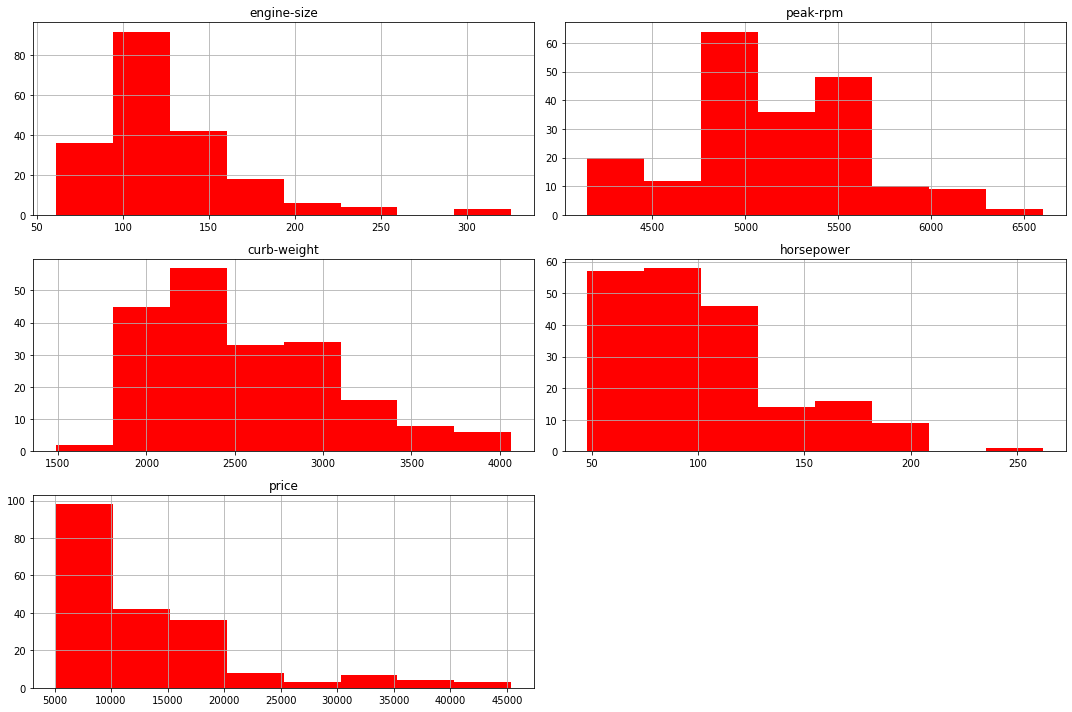

In [ ]:
plt.figure(figsize=(12,10)) #To take a page/fig size, defining paper size
df_automobile[['engine-size','peak-rpm','curb-weight','horsepower','price']].hist(figsize=(15,10),bins=8,color='r')#Select parameters,
#.hist = histogram and it's specification
#(Bins = classify the data into that many columns)
plt.tight_layout()
plt.show()

**Findings** *(Based on Histogram)*
*  Most of the car has a Curb Weight in range 1900 to 3100
* The Engine Size is in the range of 60 to 190
*  Most vehicles  have horsepower from 50 to 125
*  Most Vehicles are in the price range of 5000 to 18000
*  'peak rpm' is  mostly distributed between 4600 to 5700


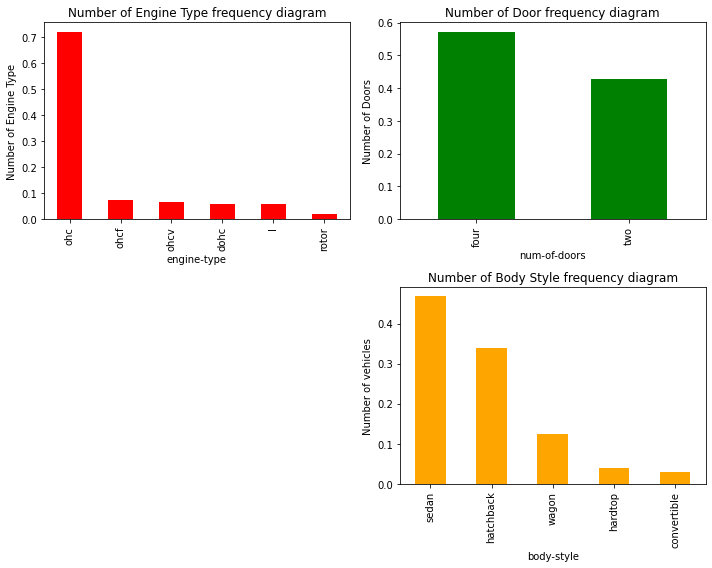

In [ ]:
plt.figure(1)
plt.subplot(221) #221 as in in QUADRANT II (last letter 1, the red plot)
df_automobile['engine-type'].value_counts(normalize=True).plot(figsize=(10,8),kind='bar',color='red') #Another type of univariate plot is count
plt.title("Number of Engine Type frequency diagram")
plt.ylabel('Number of Engine Type')
plt.xlabel('engine-type');


plt.subplot(222) #222 as in in QUADRANT I (last letter 2, the green plot)
df_automobile['num-of-doors'].value_counts(normalize=True).plot(figsize=(10,8),kind='bar',color='green')
plt.title("Number of Door frequency diagram")
plt.ylabel('Number of Doors')
plt.xlabel('num-of-doors');



plt.subplot(224) #(SKIPPING 3)224 as in in QUADRANT IV (last letter 4, the orange plot)
df_automobile['body-style'].value_counts(normalize=True).plot(figsize=(10,8),kind='bar',color='orange')
plt.title("Number of Body Style frequency diagram")
plt.ylabel('Number of vehicles')
plt.xlabel('body-style');
plt.tight_layout()
plt.show()

**Findings**
*  More than 70 % of the vehicle has Ohc type of Engine
* 57% of the cars has 4 doors

*  Most produced vehicle are of body style sedan around 48% followed by hatchback 32%

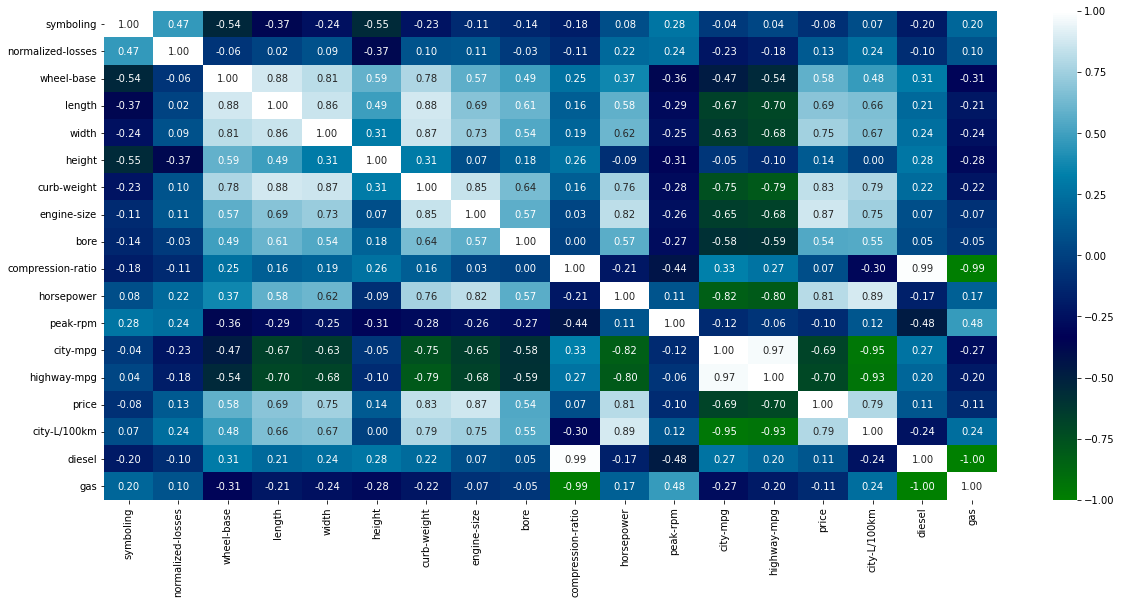

In [ ]:
import seaborn as sns
corr = df_automobile.corr() #corr = correlation
plt.figure(figsize=(20,9))
a = sns.heatmap(corr,cmap='ocean', annot=True, fmt='.2f') #Heatmap for Bivariate Analysis , cmap = colour map, google cmap matplotlib for seeing style, e.g. brg

**Findings**

* curb-size, engine-size, horsepower  are positively corelated
* city-mpg,highway-mpg are negatively corelated

**Bivariate Analysis**

>    Price Analysis

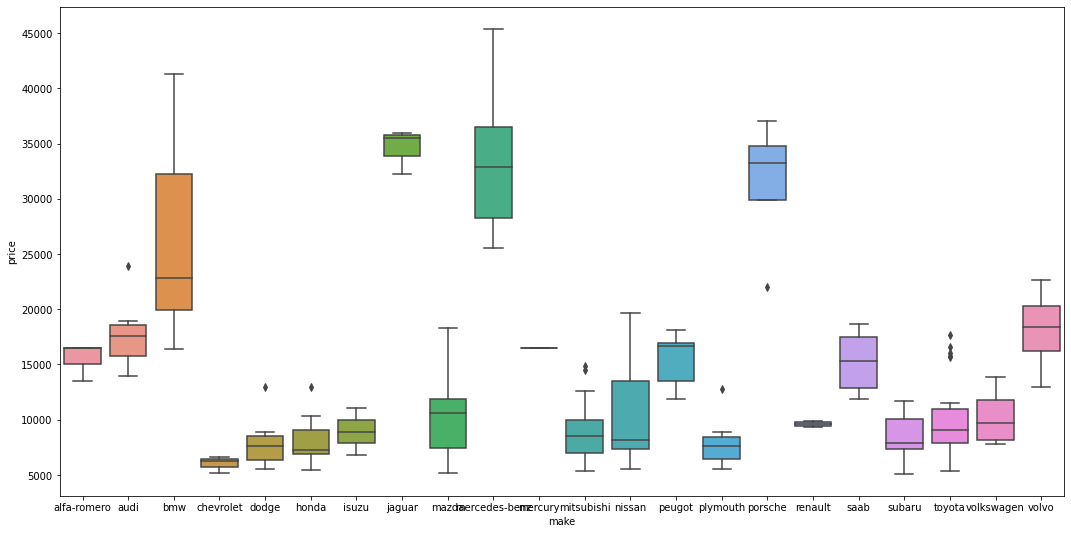

In [ ]:
plt.rcParams['figure.figsize']=(18,9)
ax = sns.boxplot(x="make", y="price", data=df_automobile)

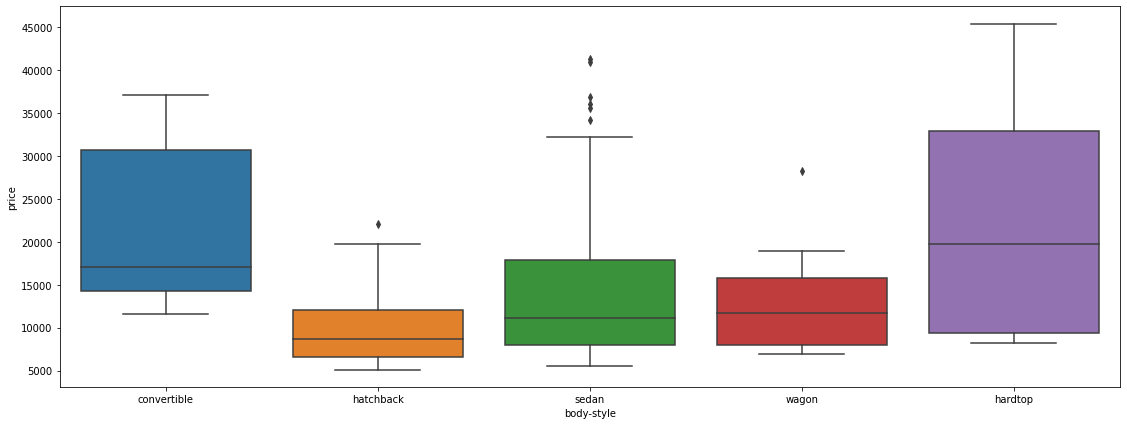

In [ ]:
plt.rcParams['figure.figsize']=(19,7)
ax = sns.boxplot(x="body-style", y="price", data=df_automobile)

Positive linear relationship

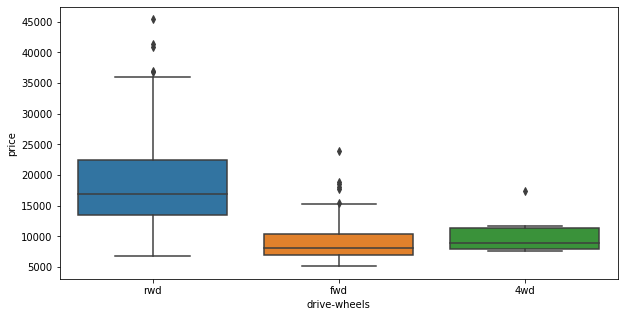

In [ ]:
plt.rcParams['figure.figsize']=(10,5)
ax = sns.boxplot(x="drive-wheels", y="price", data=df_automobile)

(0.0, 53271.360659397236)

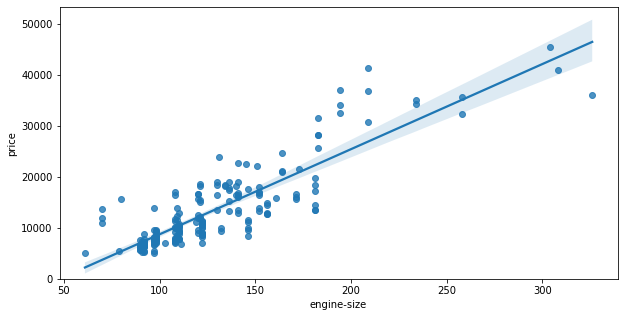

In [ ]:
# Engine size as potential predictor variable of price
sns.regplot(x="engine-size", y="price", data=df_automobile)
plt.ylim(0,)

In [ ]:
df_automobile[["engine-size", "price"]].corr()

,engine-size,price
engine-size,1.000000,0.872335
price,0.872335,1.000000


(0.0, 48179.44608393241)

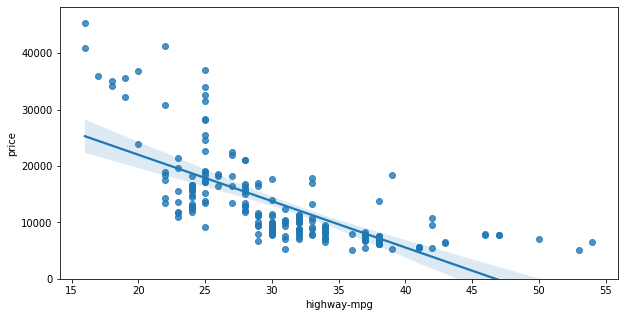

In [ ]:
sns.regplot(x="highway-mpg", y="price", data=df_automobile)
plt.ylim(0,)

In [ ]:
df_automobile[['highway-mpg', 'price']].corr()

,highway-mpg,price
highway-mpg,1.000000,-0.704692
price,-0.704692,1.000000


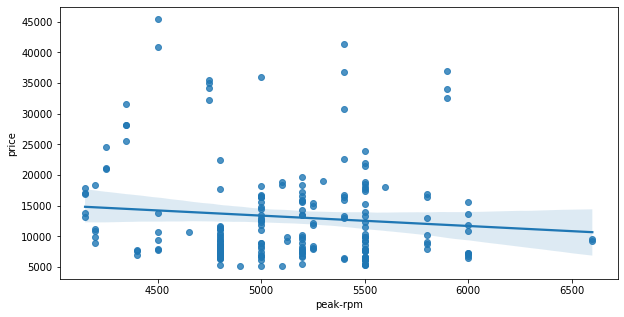

In [ ]:
sns.regplot(x="peak-rpm", y="price", data=df_automobile)

In [ ]:
df_automobile[['peak-rpm','price']].corr()

,peak-rpm,price
peak-rpm,1.000000,-0.101616
price,-0.101616,1.000000


In [ ]:
 df_automobile[["stroke","price"]].corr()


,stroke,price
stroke,1.00000,0.08231
price,0.08231,1.00000


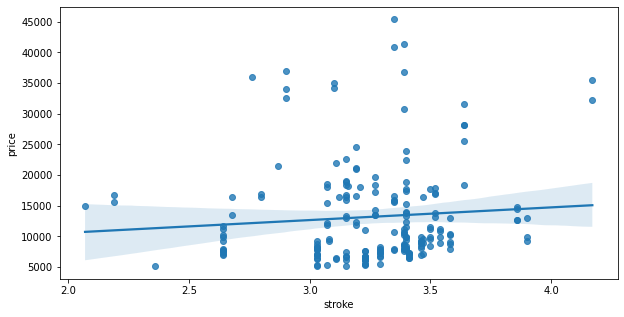

In [ ]:
sns.regplot(x="stroke", y="price", data=df_automobile)

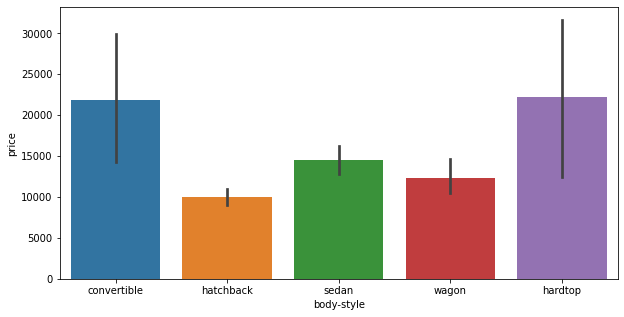

In [ ]:
sns.barplot(x="body-style", y="price", data=df_automobile)

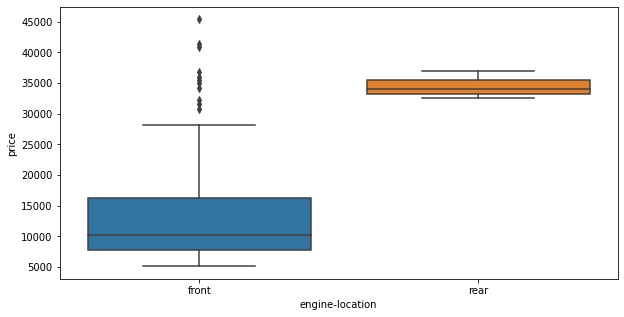

In [ ]:
sns.boxplot(x="engine-location", y="price", data=df_automobile)

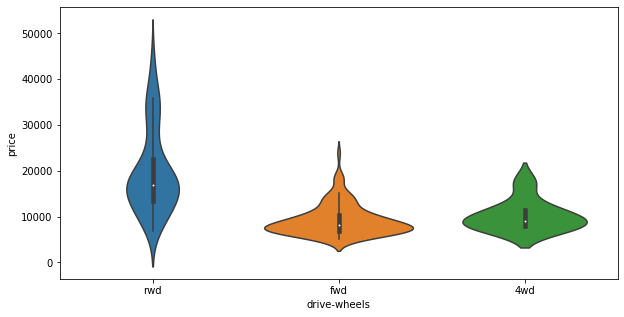

In [ ]:
# drive-wheels
sns.violinplot(x="drive-wheels", y="price", data=df_automobile)



**Price Analysis**
*  engine size and curb-weight  is positively co realted with price
* city-mpg is negatively corelated with price as  increase horsepower reduces the mileage

# **DATA ANALYTICS LABORATORY**

**ATHARV KISHOR CHAUDHARI**

*B.E. - B*

*ROLL NO. 08*